In [1]:
import os.path as op
import random
import numpy as np
import pandas as pd

from scripts.analysis.funcs.plots import SupplPlots
from scripts.figure_params import update_plot_params
from scripts.utils import get_path

### Load data

In [2]:
data_path = get_path('dataframes')

In [3]:
# data_3AFC = pd.read_pickle(op.join(data_path, '3AFC_thresholds_4rev.pkl'))

trials_data = pd.read_pickle(op.join(data_path, 'individual_trials_data.pkl'))

all_audiograms_3AFC = pd.read_pickle(op.join(data_path, '3AFC_thresholds_4rev.pkl'))

## Choose a participant

In [4]:
# participant = 'erfnpg'
# while participant == 'erfnpg':
#     participant = random.choice(all_data.participant.unique())
# participant = 'cwzopc', 'nunamh'
participant = random.choice(trials_data.participant.unique())
print(participant)

hnxrev


### Filter participant data

In [5]:
data_3AFC = pd.read_pickle(op.join(get_path('raw_data'), participant, '3AFC', f'{participant}_3AFC_data.pkl'))
audiogram_3AFC = all_audiograms_3AFC[all_audiograms_3AFC['participant'] == participant]

# audiogram_data = all_audiogram_data[all_audiogram_data['participant'] == participant]
# path_3AFC = f"/Users/nadou/Documents/Documents - Nadège’s MacBook Air/GitHub/predictive-audiograms/RAW_DATA/{participant}/3AFC/"
# trials_3AFC = pd.read_pickle(glob.glob(f"{path_3AFC}*.pkl")[0])
# trials_3AFC = trials_3AFC.rename(columns={'Frequency': 'tested_freqs', 'Level': 'tested_levels'})
# trials_3AFC.insert(len(trials_3AFC.columns), 'n_tone', np.linspace(1, len(trials_3AFC), len(trials_3AFC), dtype=int))


data_3AFC.head()

,paradigm,participant,pred,time_pred,freq_pred,tested_levels,tested_frequencies,responses,reversals,len_init
0,3AFC,hnxrev,3AFC,None,None,30.0,1000.0,1.0,0.0,0
1,3AFC,hnxrev,3AFC,None,None,30.0,1000.0,1.0,0.0,0
2,3AFC,hnxrev,3AFC,None,None,10.0,1000.0,1.0,0.0,0
3,3AFC,hnxrev,3AFC,None,None,10.0,1000.0,1.0,0.0,0
4,3AFC,hnxrev,3AFC,None,None,0.0,1000.0,1.0,0.0,0


## 3-AFC data

In [6]:
# Randomly select a tested frequency
# chosen_freq = np.random.choice(data_3AFC.tested_freqs.unique())
chosen_freq = 1000.0
print("Chosen frequency:", chosen_freq)

# Select rows with the chosen frequency
data_3AFC = data_3AFC[data_3AFC.tested_frequencies == chosen_freq]
data_3AFC['n_tone'] = np.linspace(0, len(data_3AFC)-1, len(data_3AFC))

reversal_levels = []
reversal_indices = []
for reversal, direction in data_3AFC.groupby(['reversals']):
    reversal_levels.append(direction.tested_levels.iloc[-1])
    reversal_indices.append(direction.n_tone.iloc[-1])

# Remove last reversal corresponding to extra trial
reversal_levels = reversal_levels[:6]
reversal_indices = reversal_indices[:6]

# Estimate the threshold at this frequency as the average of the last 4 reversal levels
threshold = np.round(np.nanmean(reversal_levels[-4:]), 1)
reversal_levels = reversal_levels[-4:]
reversal_indices = reversal_indices[-4:]

print("3-AFC threshold:", threshold, "dB HL")

# Check it matches the recorded threshold for that frequency
threshold_check = audiogram_3AFC[audiogram_3AFC.frequencies == chosen_freq].thresholds.iloc[0]
print("3-AFC threshold confirmation:", threshold_check, "dB HL")

Chosen frequency: 1000.0
3-AFC threshold: -13.8 dB HL
3-AFC threshold confirmation: -13.8 dB HL


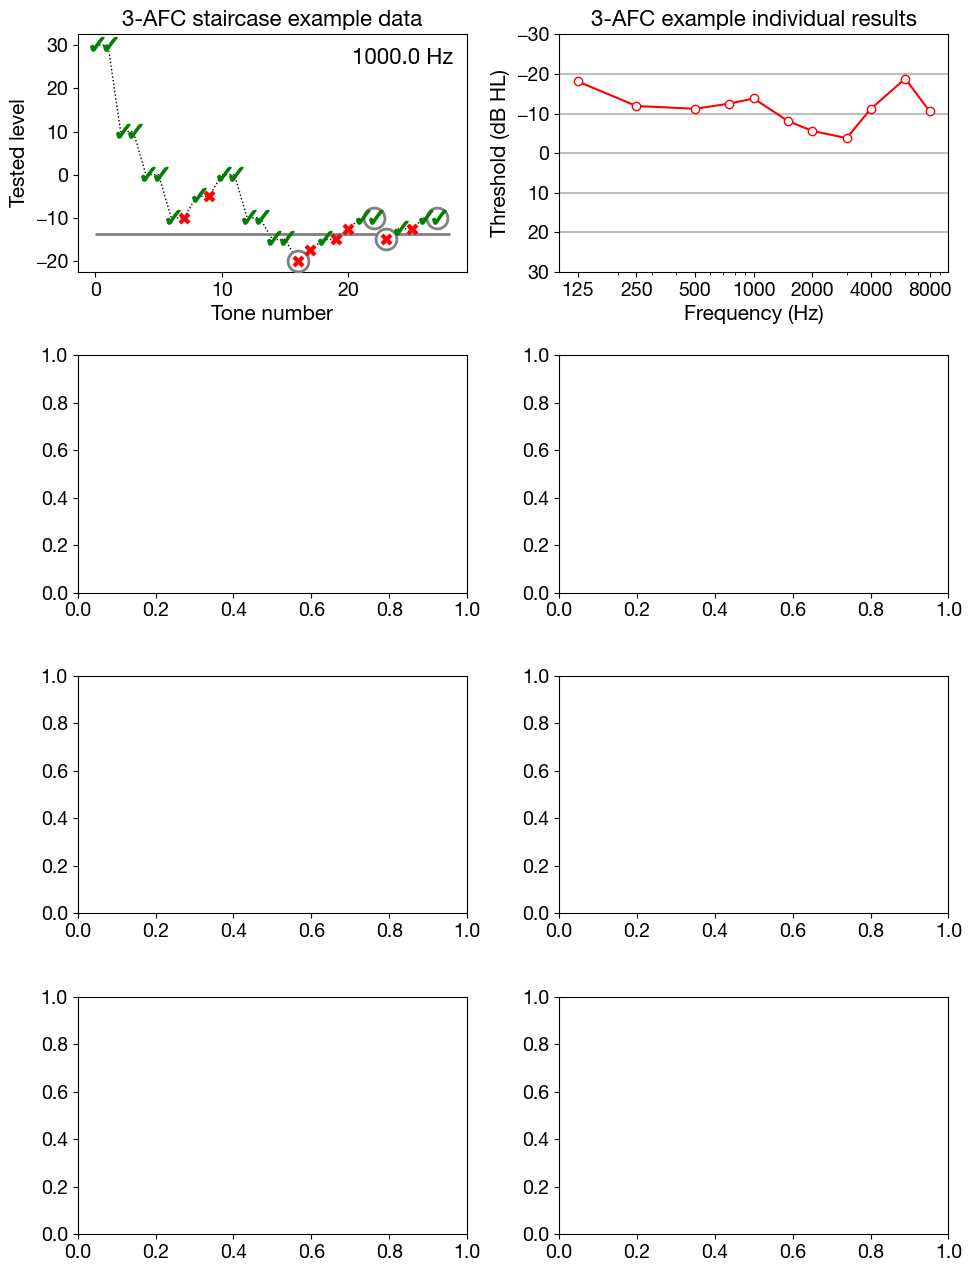

In [7]:
import matplotlib.pyplot as plt

update_plot_params()

# Create a figure and axes
fig, axes = plt.subplots(num=1, clear=True, nrows=4, ncols=2, figsize=[10, 13])

plt.sca(axes[0, 0])
SupplPlots().example_staircase(data_3AFC, threshold, reversal_indices, reversal_levels, chosen_freq)

plt.sca(axes[0, 1])
SupplPlots().example_3afc_audiogram(audiogram_3AFC, participant)

plt.sca(axes[1, 0])



plt.tight_layout()
plt.show()